In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
from tqdm import tqdm
import torch
import numpy as np
from argparse import Namespace

from env.KRCrossSessionEnvironment_GPU import KRCrossSessionEnvironment_GPU

output_path = 'output/Kuairand_Pure/env/log/'
uirm_log_path = output_path + 'user_KRMBUserResponse_lr0.0001_reg0_nlayer2.model.log'

slate_size = 6
max_step = 5
max_n_session = 4
max_return_day = 10
ep_batch_size = 16
initial_temper = max_step
rho = 0.1
return_day_bias = 0.7
feedback_influence = 0.01
args = eval(f"Namespace(uirm_log_path='{uirm_log_path}', slate_size={slate_size}, \
            max_step_per_episode={max_step}, episode_batch_size={ep_batch_size}, \
            initial_temper={initial_temper}, item_correlation={rho}, device='cpu', \
            single_response=False, max_n_session={max_n_session}, \
            max_return_day={max_return_day}, next_day_return_bias={return_day_bias}, \
            feedback_influence_on_return={feedback_influence})")

env = KRCrossSessionEnvironment_GPU(args)

/opt/conda/envs/pt_rlsim/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Environment arguments: 
Namespace(attn_n_head=4, batch_size=128, cuda=0, data_separator=',', dropout_rate=0.1, enc_dim=64, epoch=10, item_latent_dim=32, item_meta_file='dataset/Kuairand-Pure/video_features_basic_Pure_fillna.csv', l2_coef=0.0, loss='bce', lr=0.0001, max_hist_seq_len=100, meta_file_sep=',', model_path='output/Kuairand_Pure/env/user_KRMBUserResponse_lr0.0001_reg0_nlayer2.model', n_worker=4, save_with_val=False, scorer_hidden_dims=[128, 32], seed=619607, state_hidden_dims=[128], test_batch_size=128, test_file='', test_holdout_per_user=5, train_file='dataset/Kuairand-Pure/log_session_4_08_to_5_08_Pure.csv', transformer_d_forward=64, transformer_n_layer=2, user_latent_dim=32, user_meta_file='dataset/Kuairand-Pure/user_features_Pure_fillna.csv', val_batch_size=128, val_file='', val_holdout_per_user=5)
Loading raw data
Load user sequence reader
initiate KuaiRandMultiBehaior sequence reader
Loading data files
Load item meta data
Load user meta data
build vocab for onehot featur

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1187.88it/s]


build vocab for onehot features


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2078.45it/s]


build vocab for multihot features:
	tag


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 7583/7583 [00:00<00:00, 1494123.51it/s]


sequence holdout for users (-1, 0, 0)
{'raw_data_size': 1231856, 'data_size': [1231856, 0, 0], 'n_user': 15988, 'n_item': 4765, 'max_seq_len': 100, 'user_features': ['user_active_degree', 'is_live_streamer', 'is_video_author', 'follow_user_num_range', 'fans_user_num_range', 'friend_user_num_range', 'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat6', 'onehot_feat9', 'onehot_feat10', 'onehot_feat11'], 'user_feature_dims': {'user_active_degree': 9, 'is_live_streamer': 2, 'is_video_author': 2, 'follow_user_num_range': 8, 'fans_user_num_range': 9, 'friend_user_num_range': 7, 'register_days_range': 8, 'onehot_feat0': 2, 'onehot_feat1': 7, 'onehot_feat6': 3, 'onehot_feat9': 7, 'onehot_feat10': 5, 'onehot_feat11': 5}, 'item_features': ['video_type', 'music_type', 'upload_type', 'tag'], 'item_feature_dims': {'video_type': 3, 'music_type': 6, 'upload_type': 14, 'tag': 47}, 'feedback_type': ['is_click', 'long_view', 'is_like', 'is_comment', 'is_forward', 'is_follow', 'is_hate']

### User Profile and User History in the Observation Dict

In [2]:
from utils import show_batch, wrap_batch

observation = env.reset({'batch_size': ep_batch_size})
show_batch(env.current_observation['user_profile'])

user_id: size torch.Size([16]), 
	first 5 tensor([3121, 2566, 2619, 3193, 8634])
uf_user_active_degree: size torch.Size([16, 9]), 
	first 5 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]])
uf_is_live_streamer: size torch.Size([16, 2]), 
	first 5 tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
uf_is_video_author: size torch.Size([16, 2]), 
	first 5 tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
uf_follow_user_num_range: size torch.Size([16, 8]), 
	first 5 tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]])
uf_fans_user_num_range: size torch.Size([16, 9]), 
	first 5 t

In [3]:
from utils import show_batch, wrap_batch
show_batch(env.current_observation['user_history'])

history: size torch.Size([16, 100]), 
	first 5 tensor([[4287, 1945, 4284,  463, 4249, 1828,   83, 1813, 1400, 1057,   68,  461,
          417, 1550, 1535, 1363,  135,  611, 1491, 2214, 2078,  897,  663,  641,
           54,   56, 1774,  839,   56, 1829, 3621,   56,  477, 3233,  456, 2297,
          799, 1978, 1321, 1772,  870, 2834, 3756, 1770, 1944,  230, 1269,   79,
         4031,   58,  133,   57,  882,  704,   91,  134,  156, 1945, 1105, 1411,
          262,  352,  111,  844,  360, 1683, 2101,  449,   65,   62, 1300, 2138,
          731,   25, 2149, 1134,  119,  315,  614,  617,  428,  759,  927, 1422,
         1530,   73,  927,  148, 2052, 1503, 1875, 1391,  479,  652, 1097,  355,
         2068,  242, 1128,  278],
        [ 467,   56, 2108, 1309,  927,  480, 1401, 1609, 1401, 2198, 1200, 1554,
         2390,  298,  355,  192,   23, 2513,  433, 2206, 3844,  492, 3983,  613,
         1471,   39, 1824,  423, 1754, 1240, 2513, 1790,  456,  622, 2115, 3191,
         2115, 1836, 4211,  

### Random Interaction

In [11]:
from tqdm import tqdm
import torch
env.next_day_return_bias = 0.3
for i in tqdm(range(200)):
    action = torch.randn(ep_batch_size,env.action_dim)
    new_observation, user_feedback, updated_observation = env.step({'action': action})
    observation = new_observation

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:49<00:00,  1.83it/s]


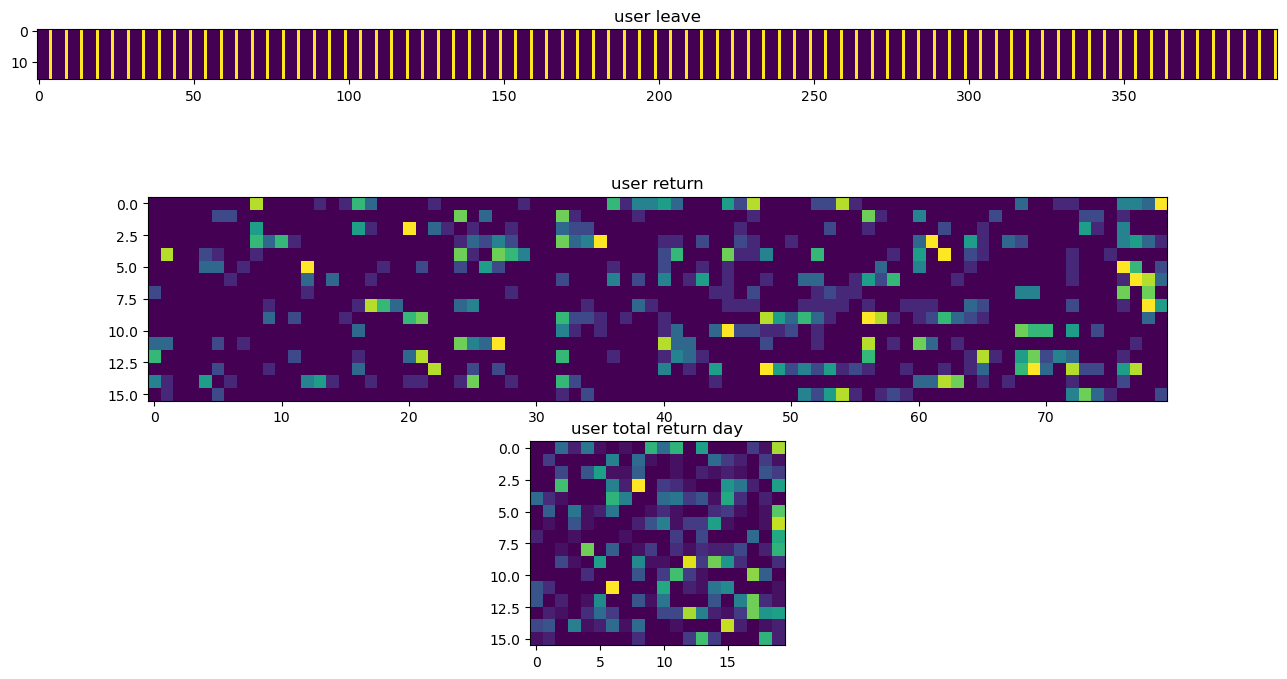

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
H = np.transpose(np.array(env.user_leave_history).astype(int))
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('user leave')
H = np.transpose(np.array(env.user_return_history).astype(int))
plt.subplot(3,1,2)
plt.imshow(H)
plt.title('user return')
H = np.transpose(np.array(env.user_total_return_gap).astype(int))
plt.subplot(3,1,3)
plt.imshow(H)
plt.title('user total return day')
plt.show()

### Example of User Response

In [13]:
user_feedback.keys()

dict_keys(['immediate_response', 'user_state', 'done', 'retention'])

In [14]:
user_feedback['user_state'].shape

torch.Size([16, 1, 192])

In [15]:
print('done signal:', user_feedback['done'])
print('return signal:', user_feedback['retention'])

done signal: tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])
return signal: tensor([10.,  1.,  1.,  2.,  1.,  3.,  4.,  1.,  6.,  1.,  1.,  1.,  1.,  1.,
         1.,  3.])


In [16]:
# (episode_batch_size, slate_size, n_response_types)
print(user_feedback['immediate_response'].shape)
print(user_feedback['immediate_response'])

torch.Size([16, 6, 7])
tensor([[[0., 0., 1., 1., 1., 0., 1.],
         [0., 0., 1., 0., 1., 0., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 0., 1., 1., 1.],
         [0., 0., 1., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1., 0., 1.]],

        [[0., 0., 1., 1., 0., 0., 1.],
         [0., 0., 1., 0., 0., 1., 1.],
         [0., 1., 1., 1., 1., 0., 1.],
         [0., 0., 0., 1., 0., 0., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 1.]],

        [[0., 0., 1., 1., 1., 0., 1.],
         [0., 0., 1., 1., 0., 0., 1.],
         [0., 0., 1., 1., 0., 1., 1.],
         [0., 0., 1., 1., 1., 0., 1.],
         [0., 0., 1., 1., 1., 0., 1.],
         [1., 0., 1., 1., 1., 0., 1.]],

        [[1., 1., 1., 1., 0., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 0., 1., 1.],
         [1., 1., 1., 1., 0., 1., 1.],
         [1., 1., 1., 1., 0., 1., 1.],
         [1., 1., 1., 1., 0., 1., 1.]],

        [[1., 1., 1., 1., 0., 1.,

In [17]:
action.shape, action

(torch.Size([16, 7]),
 tensor([[-2.3123e+00,  7.3594e-01,  1.5673e+00, -1.4366e+00,  6.7455e-02,
          -2.0010e+00,  1.7466e+00],
         [-1.3516e-01,  3.0200e-02,  1.2427e+00,  1.1788e+00, -2.5461e+00,
           1.7353e-01,  1.7029e-01],
         [-9.8309e-01, -5.2246e-02, -4.6502e-01,  8.8839e-01,  2.9439e-01,
          -3.2337e-01,  5.8804e-03],
         [ 8.0077e-01,  7.6461e-01, -9.4613e-01,  6.1229e-01, -8.5944e-01,
           1.6013e+00,  1.7629e+00],
         [ 2.9259e-01, -9.6881e-01,  7.7245e-01,  7.9923e-01, -1.2511e+00,
          -4.7028e-01,  2.9206e-01],
         [ 8.9766e-01,  8.3021e-01, -1.2203e+00, -1.6569e+00, -1.9632e+00,
          -6.4195e-01,  3.4232e-01],
         [ 3.1222e-01,  8.5400e-01, -1.5432e+00, -1.4886e+00,  6.9443e-01,
           5.1753e-01,  1.1309e+00],
         [ 1.7438e+00,  9.4360e-02,  6.9958e-01, -8.6375e-02, -1.8406e+00,
           1.4525e-01,  9.2251e-02],
         [ 3.3595e-01, -3.2013e-01, -1.5917e-01,  1.6294e+00,  1.0352e+00,
       